In [1]:
import sys
sys.path.append("./../common/")
from utils import *
from config import *

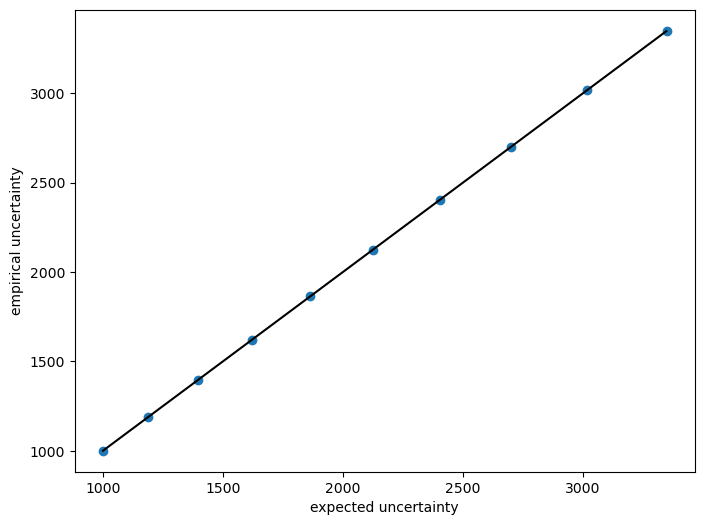

In [2]:
def k_models_varaince(K, m, c, sd_m, sd_c, N):

    gradients = np.random.normal(m, sd_m, K).reshape(-1, 1)
    intercepts = np.random.normal(c, sd_c, K).reshape(-1, 1)

    next_N_x = np.arange(N, 2 * N)

    equation_vars = (np.square(next_N_x) * (sd_m ** 2))  + (sd_c ** 2)

    empirical_vars = []
    for n in next_N_x:
        x_for_pred = np.full((K, 1), n)
        y_pred = (gradients * x_for_pred) + intercepts
        empirical_vars.append(np.var(y_pred))
    return empirical_vars, equation_vars

empirical_vars, equation_vars = k_models_varaince(K=1000000, m=5, c=4, sd_m=3, sd_c=10, N=10)

fig = plt.figure()
plt.scatter(equation_vars, empirical_vars)
line = np.arange(np.min(equation_vars), np.max(equation_vars))
plt.plot(line, line, c="black")
save_xy_graph(fig, "expected uncertainty", "empirical uncertainty", figures_dir, 'model_unc.png', legend=False)

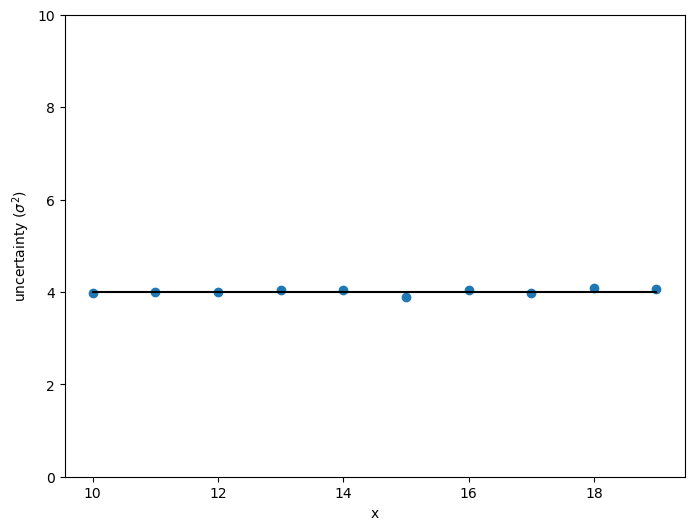

In [3]:
def data_noise_variance(m, c, sd_e, N, S):
    next_N_x = np.arange(N, (2 * N))

    equation_vars = np.full((1,N), (m**2 * sd_e**2))[0]
    empirical_vars = []
    for x in next_N_x:
        noises = np.random.normal(0, sd_e, S)
        y_for_samples = ((m * (x + noises)) + c)
        empirical_vars.append(np.var(y_for_samples))
    return empirical_vars, equation_vars

N=10
empirical_vars, equation_vars = data_noise_variance(m=2, c=1, sd_e=1, N=N, S=10000)
next_N_x = np.arange(N, 2 * N)

fig = plt.figure()
plt.scatter(next_N_x, empirical_vars, label="empirical")
plt.plot(next_N_x, equation_vars, c="black", label="expected")
plt.ylim([0, 10])
save_xy_graph(fig, "x", "uncertainty ($\sigma^2$)", figures_dir, 'data_unc.png', legend=False)

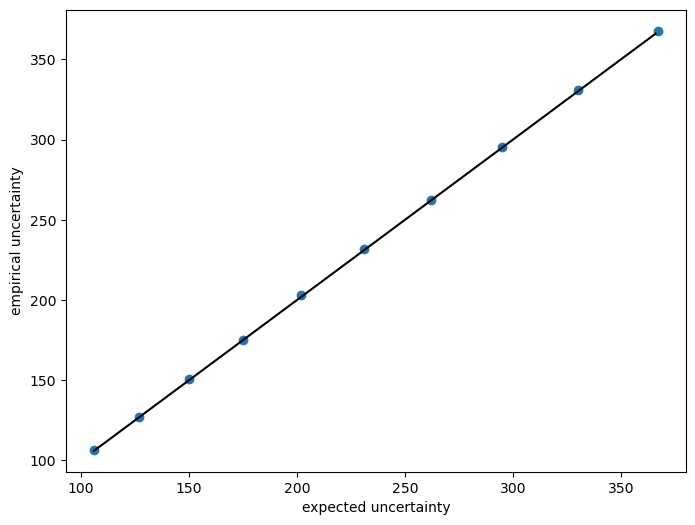

In [4]:
def combined_varaince(m, c, K, S, N, sd_m, sd_c, sd_e):
    gradients = np.random.normal(m, sd_m, K).reshape(-1, 1)
    intercepts = np.random.normal(c, sd_c, K).reshape(-1, 1)
    gradients = np.repeat(gradients, S).reshape(-1, 1)
    intercepts = np.repeat(intercepts, S).reshape(-1, 1)

    next_N_x = np.arange(N, 2 * N)

    equation_vars = (m**2 * sd_e**2) + (np.square(next_N_x) * (sd_m**2)) + (sd_m**2 * sd_e**2) + (sd_c**2)

    empirical_vars = []
    for n in next_N_x:
        x_for_pred = np.full((K*S, 1), n)
        noises = np.random.normal(0, sd_e, S).reshape(-1, 1)
        noises = np.tile(noises, (K, 1))
        predictions = (gradients * (x_for_pred + noises)) + intercepts
        empirical_vars.append(np.var(predictions))
    return empirical_vars, equation_vars

empirical_vars, equation_vars = combined_varaince(m=2, c=1, K=10000, S=10000, N=10, sd_m=1, sd_c=1, sd_e=1)

fig = plt.figure()
plt.scatter(equation_vars, empirical_vars)
line = np.arange(np.min(equation_vars), np.max(equation_vars))
plt.plot(line, line, c="black")
save_xy_graph(fig, "expected uncertainty", "empirical uncertainty", figures_dir, 'datamodel_unc.png', legend=False)

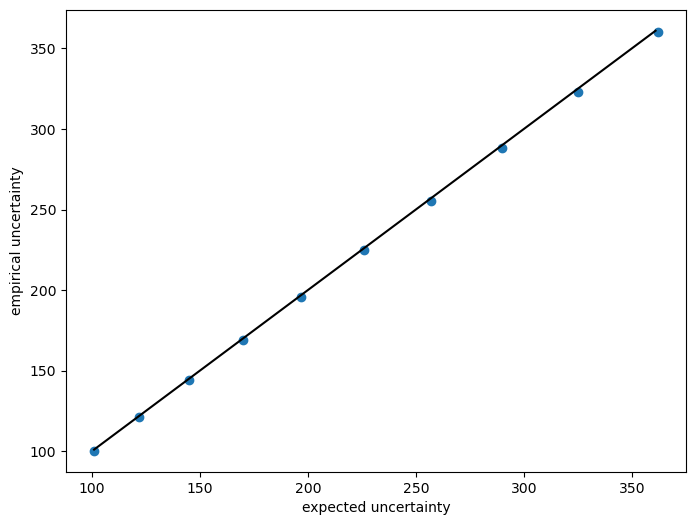

In [5]:
empirical_vars, equation_vars = combined_varaince(m=2, c=1, K=10000, S=10000, N=10, sd_m=1, sd_c=1, sd_e=0)

fig = plt.figure()
plt.scatter(equation_vars, empirical_vars)
line = np.arange(np.min(equation_vars), np.max(equation_vars))
plt.plot(line, line, c="black")
save_xy_graph(fig, "expected uncertainty", "empirical uncertainty", figures_dir, 'datamodel_unc_model.png', legend=False)

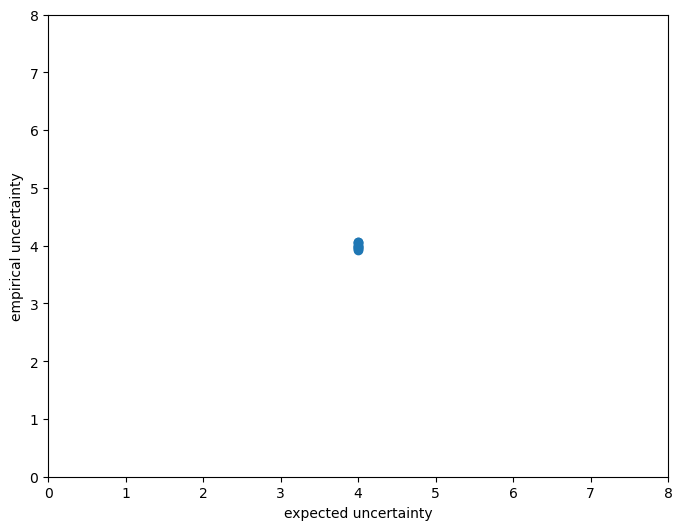

In [6]:
empirical_vars, equation_vars = combined_varaince(m=2, c=1, K=10000, S=10000, N=10, sd_m=0, sd_c=0, sd_e=1)

fig = plt.figure()
plt.scatter(equation_vars, empirical_vars)
line = np.arange(np.min(equation_vars), np.max(equation_vars))
plt.plot(line, line, c="black")
plt.xlim([0, 8])
plt.ylim([0, 8])
save_xy_graph(fig, "expected uncertainty", "empirical uncertainty", figures_dir, 'datamodel_unc_data.png', legend=False)

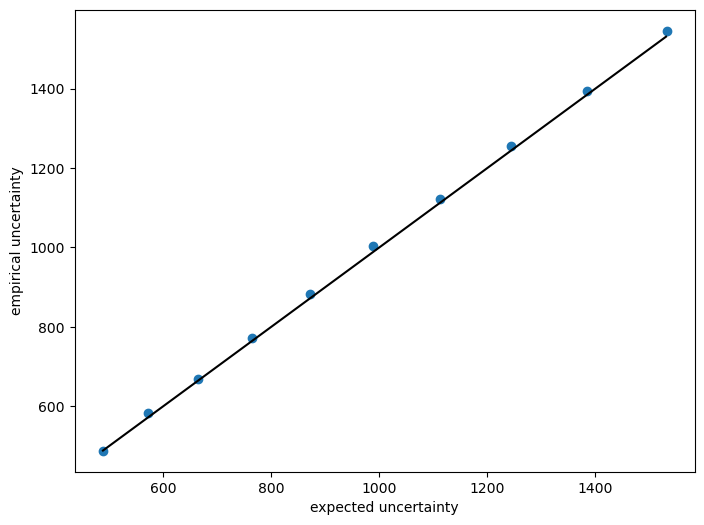

In [7]:
empirical_vars, equation_vars = combined_varaince(m=2, c=1, K=10000, S=10000, N=10, sd_m=2, sd_c=4, sd_e=3)

fig = plt.figure()
plt.scatter(equation_vars, empirical_vars)
line = np.arange(np.min(equation_vars), np.max(equation_vars))
plt.plot(line, line, c="black")
save_xy_graph(fig, "expected uncertainty", "empirical uncertainty", figures_dir, 'datamodel_unc_vary.png', legend=False)
